In [ ]:
import pandas as pd
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torchvision.utils as vutils




In [ ]:
# Hyperparameters

batch_size = 64 # Batch size during training
image_size = 128  # Images are 128x128(resized)
image_channels = 3  # RGB images
ngpu=1 #number of GPUs to use
z_dim = 100  # Size/dimension of the latent vector (input noise)
gen_features = 64  # Feature map size of Generator
dis_features = 64  # Feature map size Discriminator
epochs = 100  # Number of epochs during train
lr = 0.0002  # Learning rate
beta1 = 0.5  # Beta1-A hyperparameter in Adam optimizer
beta2= 0.999 # Beta2-A hyperparameter in for Adam optimizer


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
img_list = []
Gen_losses = []
Disc_losses = []

real_label = 1.
fake_label = 0.

iters = 0
num_epochs = 100

print("Starting.............................")
for epoch in range(num_epochs):
    for i, data in enumerate(dataloader, 0):
        Disc.zero_grad()
        real_cpu = data[0].to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)#creating labels for real images
         #Forward pass(real images-discriminator)
        output = Disc(real_cpu).view(-1)
        Disc_real_loss = criterion(output, label)
        Disc_real_loss.backward()
        #Generating the fake images by generator
        noise = torch.randn(b_size, nz, 1, 1, device=device)
        fake = Gen(noise)
        label.fill_(fake_label)
        #Forward pass(Fake images-discriminator)
        output = Disc(fake.detach()).view(-1)
        Disc_fake_loss = criterion(output, label)
        Disc_fake_loss.backward()

        Disc_loss = Disc_real_loss + Disc_fake_loss
        #Disc_loss = (Disc_real_loss + Disc_fake_loss)/ 2
        Disc_optimizer.step()

        Gen.zero_grad()
        label.fill_(real_label)

        output = Disc(fake).view(-1)
        Gen_loss = criterion(output, label)
        Gen_loss.backward()
        Gen_optimizer.step()

        if i % 50 == 0: #print at every 50 iters
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f'
                  % (epoch, num_epochs, i//50 + 1, len(dataloader)//50 + 1,
                     Disc_loss.item(), Gen_loss.item()))

        Gen_losses.append(Gen_loss.item())
        Disc_losses.append(Disc_loss.item())

        if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
            with torch.no_grad():
                fake = Gen(fixed_noise).detach().cpu() #image generation at fixed noise
            img_list.append(vutils.make_grid(fake, padding=2, normalize=True))

        iters += 1

Starting.........
[0/100][1/2]	Loss_D: 1.8834	Loss_G: 7.3052
[0/100][2/2]	Loss_D: 1.2583	Loss_G: 20.1065
[1/100][1/2]	Loss_D: 0.1269	Loss_G: 7.1721
[1/100][2/2]	Loss_D: 0.2694	Loss_G: 5.0242
[2/100][1/2]	Loss_D: 0.0661	Loss_G: 6.2430
[2/100][2/2]	Loss_D: 1.1747	Loss_G: 3.4267
[3/100][1/2]	Loss_D: 0.5023	Loss_G: 4.0838
[3/100][2/2]	Loss_D: 0.3217	Loss_G: 6.1249
[4/100][1/2]	Loss_D: 0.5726	Loss_G: 4.6348
[4/100][2/2]	Loss_D: 0.3459	Loss_G: 2.7765
[5/100][1/2]	Loss_D: 0.9850	Loss_G: 9.5002
[5/100][2/2]	Loss_D: 0.2468	Loss_G: 6.8167
[6/100][1/2]	Loss_D: 1.0757	Loss_G: 3.2986
[6/100][2/2]	Loss_D: 0.2176	Loss_G: 3.4982
[7/100][1/2]	Loss_D: 0.2314	Loss_G: 4.5121
[7/100][2/2]	Loss_D: 0.7569	Loss_G: 5.3910
[8/100][1/2]	Loss_D: 0.3198	Loss_G: 4.2182
[8/100][2/2]	Loss_D: 0.6200	Loss_G: 3.0291
[9/100][1/2]	Loss_D: 0.6349	Loss_G: 2.8839
[9/100][2/2]	Loss_D: 0.7931	Loss_G: 3.7523
[10/100][1/2]	Loss_D: 1.2417	Loss_G: 5.5632
[10/100][2/2]	Loss_D: 0.2579	Loss_G: 4.1146
[11/100][1/2]	Loss_D: 0.6376	Loss

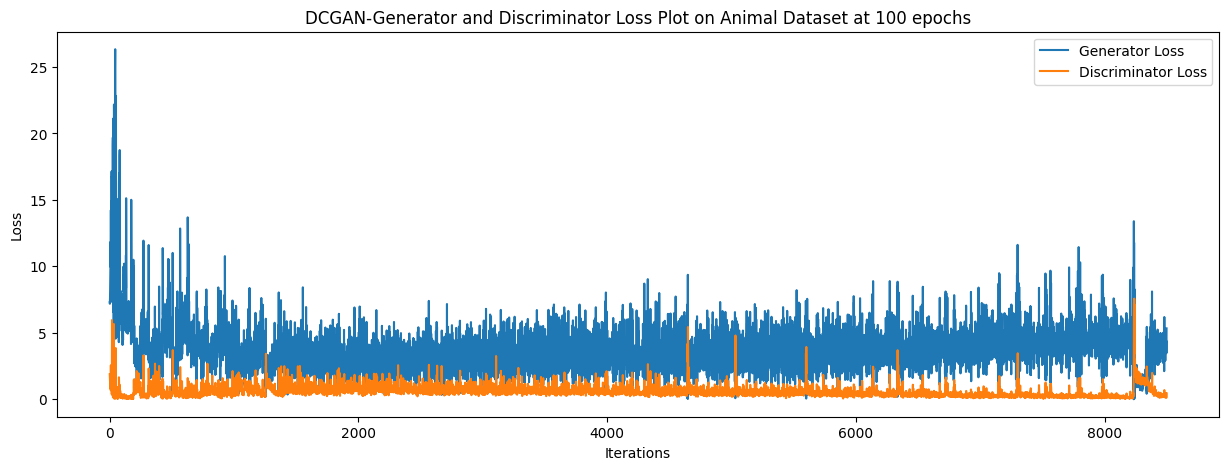

In [ ]:
plt.figure(figsize=(15,5))
plt.title("DCGAN-Generator and Discriminator Loss Plot on Animal Dataset at 100 epochs")
plt.plot(G_losses,label="Generator Loss")
plt.plot(D_losses,label="Discriminator Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()




Plot a 10 by 10 grid of images for generated images

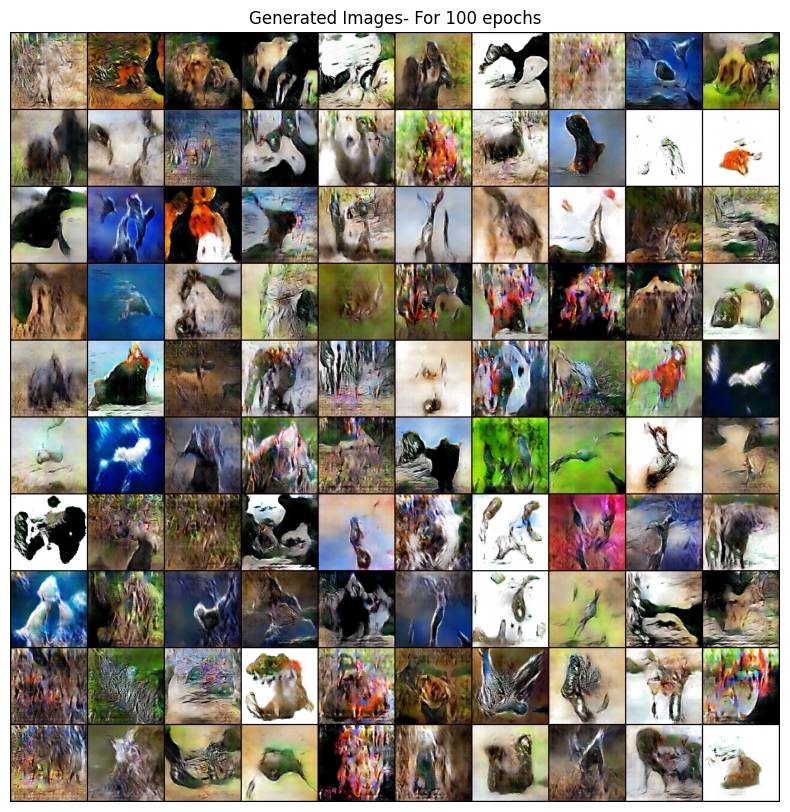

In [ ]:
# Plotting generated images in 10x10 grid
with torch.no_grad():
    fixed_noise = torch.randn(100, nz, 1, 1, device=device)
    fake_images = Gen(fixed_noise).detach().cpu()

plt.figure(figsize=(10,10))
plt.axis("off")
plt.title("Generated Images- For 100 epochs")
plt.imshow(np.transpose(vutils.make_grid(fake_images, nrow=10, padding=2, normalize=True), (1,2,0)))
plt.show()


Butterfly dataset(Trainig Loop)

100 epochs

In [ ]:
img_list = []
Gen_losses = []
Disc_losses = []

real_label = 1.
fake_label = 0.

iters = 0
num_epochs = 100

print("Starting...................")
for epoch in range(num_epochs):
    for i, data in enumerate(bydataloader, 0):
        Disc.zero_grad()
        real_cpu = data[0].to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)#creating labels for real images
         #Forward pass(real images-discriminator)
        output = Disc(real_cpu).view(-1)
        Disc_real_loss = criterion(output, label)
        Disc_real_loss.backward()
        #Generating the fake images by generator
        noise = torch.randn(b_size, nz, 1, 1, device=device)
        fake = Gen(noise)
        label.fill_(fake_label)
        #Forward pass(Fake images-discriminator)
        output = Disc(fake.detach()).view(-1)
        Disc_fake_loss = criterion(output, label)
        Disc_fake_loss.backward()

        Disc_loss = Disc_real_loss + Disc_fake_loss
        #Disc_loss = (Disc_real_loss + Disc_fake_loss)/ 2
        Disc_optimizer.step()

        Gen.zero_grad()
        label.fill_(real_label)

        output = Disc(fake).view(-1)
        Gen_loss = criterion(output, label)
        Gen_loss.backward()
        Gen_optimizer.step()

        if i % 50 == 0: #print at every 50 iters
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f'
                  % (epoch, num_epochs, i//50 + 1, len(bydataloader)//50 + 1,
                     Disc_loss.item(), Gen_loss.item()))

        Gen_losses.append(Gen_loss.item())
        Disc_losses.append(Disc_loss.item())

        if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(bydataloader)-1)):
            with torch.no_grad():
                fake = Gen(fixed_noise).detach().cpu() #image generation at fixed noise
            img_list.append(vutils.make_grid(fake, padding=2, normalize=True))

        iters += 1

Starting.................
[0/100][1/3]	Loss_D: 1.7540	Loss_G: 8.6687
[0/100][2/3]	Loss_D: 1.1697	Loss_G: 12.7519
[0/100][3/3]	Loss_D: 0.8809	Loss_G: 16.1215
[1/100][1/3]	Loss_D: 1.1979	Loss_G: 7.2577
[1/100][2/3]	Loss_D: 1.0323	Loss_G: 2.8760
[1/100][3/3]	Loss_D: 0.6117	Loss_G: 3.5748
[2/100][1/3]	Loss_D: 0.4386	Loss_G: 3.3774
[2/100][2/3]	Loss_D: 0.1245	Loss_G: 5.2995
[2/100][3/3]	Loss_D: 0.2458	Loss_G: 5.8620
[3/100][1/3]	Loss_D: 0.4826	Loss_G: 8.3843
[3/100][2/3]	Loss_D: 0.0827	Loss_G: 5.3671
[3/100][3/3]	Loss_D: 1.3027	Loss_G: 6.7448
[4/100][1/3]	Loss_D: 1.2689	Loss_G: 8.1684
[4/100][2/3]	Loss_D: 0.2711	Loss_G: 6.9587
[4/100][3/3]	Loss_D: 0.2285	Loss_G: 4.4179
[5/100][1/3]	Loss_D: 0.1680	Loss_G: 4.2563
[5/100][2/3]	Loss_D: 0.3107	Loss_G: 8.0203
[5/100][3/3]	Loss_D: 1.0989	Loss_G: 7.3163
[6/100][1/3]	Loss_D: 2.4300	Loss_G: 9.1514
[6/100][2/3]	Loss_D: 1.1482	Loss_G: 4.4608
[6/100][3/3]	Loss_D: 0.6952	Loss_G: 5.2923
[7/100][1/3]	Loss_D: 0.3409	Loss_G: 5.3699
[7/100][2/3]	Loss_D: 0.307

50 epochs

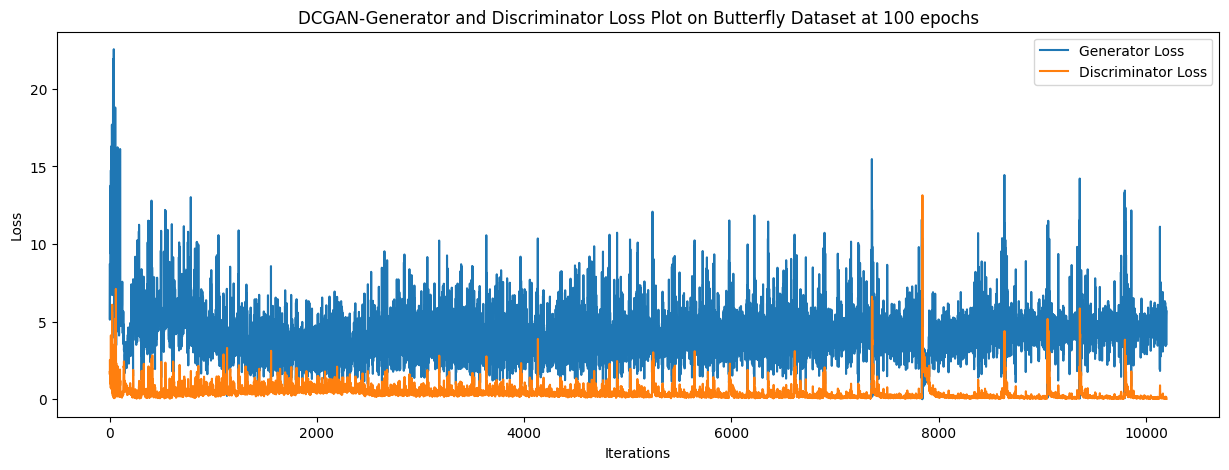

In [ ]:
plt.figure(figsize=(15,5))
plt.title("DCGAN-Generator and Discriminator Loss Plot on Butterfly Dataset at 100 epochs")
plt.plot(G_losses,label="Generator Loss")
plt.plot(D_losses,label="Discriminator Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()


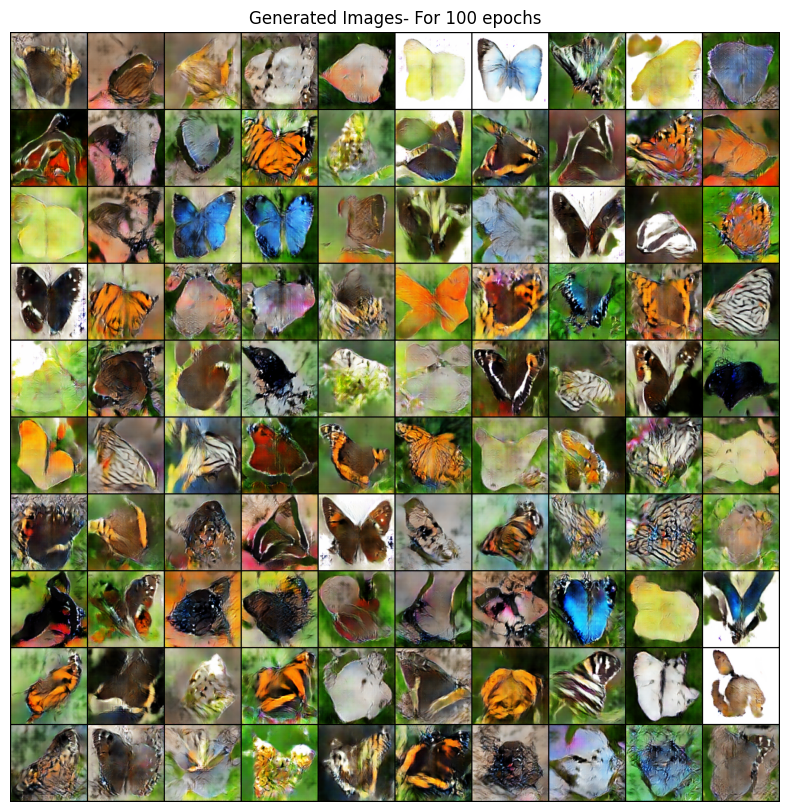

In [ ]:
# 10x10 grid for the final epoch
with torch.no_grad():
    fixed_noise = torch.randn(100, nz, 1, 1, device=device)
    fake_images = netG(fixed_noise).detach().cpu()

# Plot a 10x10 grid of generated images
plt.figure(figsize=(10,10))
plt.axis("off")
plt.title("Generated Images- For 100 epochs")
plt.imshow(np.transpose(vutils.make_grid(fake_images, nrow=10, padding=2, normalize=True), (1,2,0)))
plt.show()


In [ ]:
#Creating the paths and Saving the images corresponding created image paths

real_path = "./real_images"
fake_path = "./fake_images"

os.makedirs(real_path, exist_ok=True)
os.makedirs(fake_path, exist_ok=True)


def save_images_in_paths(images, path, prefix="img"):
    for i, imgs in enumerate(images):
        save_image(imgs, os.path.join(path, f"{i}.png"))

I have done some experimentations with beta's (Mentioned in report the values and insights we got)



Calculating FID (Fréchet Inception Distance) on 1000 samples


In [ ]:
pip install pytorch-fid

In [ ]:
# Collecting the 1000 real images
real_images = []
for i, (real_batch, _) in enumerate(dataloader):
    real_images.append(real_batch)
    #Ensures to pick the 1000 real images
    if len(torch.cat(real_images)) >= 1000:
        real_images = torch.cat(real_images)[:1000]
        break

save_images_in_paths(real_images, real_path)

In [ ]:
#Collecting the 1000 fake images from Generator model

fake_images = []
Gen.eval()

with torch.no_grad():
    while len(fake_images) < 1000:
        noise = torch.randn(batch_size, nz, 1, 1, device=device)
        fake = Gen(noise)
        fake_images.append(fake)

    fake_images = torch.cat(fake_images)[:1000]

save_images(fake_images, fake_path)

In [ ]:

from pytorch_fid import fid_score

fid_value = fid_score.calculate_fid_given_paths([real_path, fake_path], batch_size=50, device=device, dims=2048)

print(f"FID score: {fid_value}")


Downloading: "https://github.com/mseitzer/pytorch-fid/releases/download/fid_weights/pt_inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/pt_inception-2015-12-05-6726825d.pth
100%|██████████| 91.2M/91.2M [00:00<00:00, 127MB/s]
100%|██████████| 20/20 [00:01<00:00, 15.81it/s]


FID score: 138.7065641657506
